### This notebook contains some loops I made to calculate the Δb change in big earthquakes

In [22]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import *
%matplotlib inline 
# plot inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png') # output figure in png format
import matplotlib.pyplot as plt
from obspy.core.utcdatetime import UTCDateTime #convert time to UTC time
mpl.rcParams['figure.dpi']= 500 # setup the figure resolution


# add the google drive directory into path
#from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/drive/MyDrive/traffic_light_project/'
path = 'C:/Users/yair_/Documents/Traffic Light Project/'

In [23]:
qfault=np.loadtxt(path+'qfaults.txt')
# fault data from USGS website

In [24]:
year = []
lat = []
lon = []
dep = []
mag = []
evid = []
time_utc = []
time_year = []
fid = open(path+'bayarea84pres.txt')
# read in the header
line = fid.readline()
print(line)
line = fid.readline()
print(line)

#read in event lines
num = 0
for line in fid:
    num = num + 1
    if num%1000 == 0:
        print(num)
    info = line.split()
    if len(info) <2:
        continue
    iyear = int(info[0][:4])
    ilat = float(info[2])
    ilon = float(info[3])
    idep = float(info[4])
    imag = float(info[5])
    ievid = int(info[-1])
    itime_utc = float(UTCDateTime(info[0]+'T'+info[1]))
    itime_year = iyear + (itime_utc-float(UTCDateTime(iyear,1,1)))/(float(UTCDateTime(iyear+1,1,1)-float(UTCDateTime(iyear,1,1))))

    year.append(iyear)
    lat.append(ilat)
    lon.append(ilon)
    dep.append(idep)
    mag.append(imag)
    evid.append(ievid)
    time_utc.append(itime_utc)
    time_year.append(itime_year)
  
#convert list into array
year = np.asarray(year)
lat = np.asarray(lat)
lon = np.asarray(lon)
dep = np.asarray(dep)
mag = np.asarray(mag)
evid = np.asarray(evid)
time_utc = np.asarray(time_utc)
time_year = np.asarray(time_year)

Date       Time              Lat        Lon   Depth   Mag Magt  Nst Gap  Clo  RMS  SRC   Event ID

-------------------------------------------------------------------------------------------------

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000


In [25]:
def convert(lat_all,lon_all,lat0,lon0,azimuth,mdist,halfwidth=10):
    # Input:
    # lat_all: latitude of all points
    # lon_all: longitude of all points
    # lat0, lon0 : starting point location for the projection
    # azimuth: azimuth of the projection
    # mdist: distance along the projection from lat0,lon0
    # halfwidth: half width from the projection line
    
    # Output:
    # dist_along_all, dist_norm_all: distance along and normal to the projection
    # mlat, mlon: end point of the projection
    # box_coor: coordinates of the selected polygon
    import math
    x_all = (lon_all-lon0)*40000*np.cos((lat_all+lat0)*np.pi/360)/360
    y_all = (lat_all-lat0)*40000/360
    
    x0=0
    y0=0
    x1=np.sin(azimuth/180*np.pi)
    y1=np.cos(azimuth/180*np.pi)
    
    dist_all=np.sqrt(x_all**2+y_all**2)
    
    dist_along_all=x_all*x1+y_all*y1
    dist_norm_all=x_all*y1-y_all*x1
    
    mlat=mdist*y1*360/40000+lat0
    mlon=mdist*x1*360/40000/np.cos((mlat+lat0)*np.pi/360)+lon0
    
    blat1=lat0+halfwidth*x1*360/40000
    blon1=lon0-halfwidth*y1*360/40000/np.cos((mlat+lat0)*np.pi/360)
    blat2=lat0-halfwidth*x1*360/40000
    blon2=lon0+halfwidth*y1*360/40000/np.cos((mlat+lat0)*np.pi/360)
    blat3=mlat-halfwidth*x1*360/40000
    blon3=mlon+halfwidth*y1*360/40000/np.cos((mlat+lat0)*np.pi/360)
    blat4=mlat+halfwidth*x1*360/40000
    blon4=mlon-halfwidth*y1*360/40000/np.cos((mlat+lat0)*np.pi/360)
    
    
    box_coor=np.asarray([[blat1,blon1],[blat2,blon2],[blat3,blon3],[blat4,blon4],[blat1,blon1]])
    return dist_along_all,dist_norm_all,mlat,mlon,box_coor

In [68]:
#napa
lat0_proj= 38.45
lon0_proj=-122.43
azimuth_proj=160
mdist_proj=40
#clvrs
# lat0_proj= 37.54
# lon0_proj=-121.85
# azimuth_proj=150
# mdist_proj=60
#hwrd
# lat0_proj= 38
# lon0_proj=-122.35
# azimuth_proj=145
# mdist_proj=70
#lp
# lat0_proj= 37.25
# lon0_proj=-122.1
# azimuth_proj=132
# mdist_proj=70

dist_along_proj,dist_norm_proj,mlat_proj,mlon_proj,box_coor_proj= \
    convert(lat,lon,lat0_proj,lon0_proj,azimuth_proj,mdist_proj,halfwidth=5)

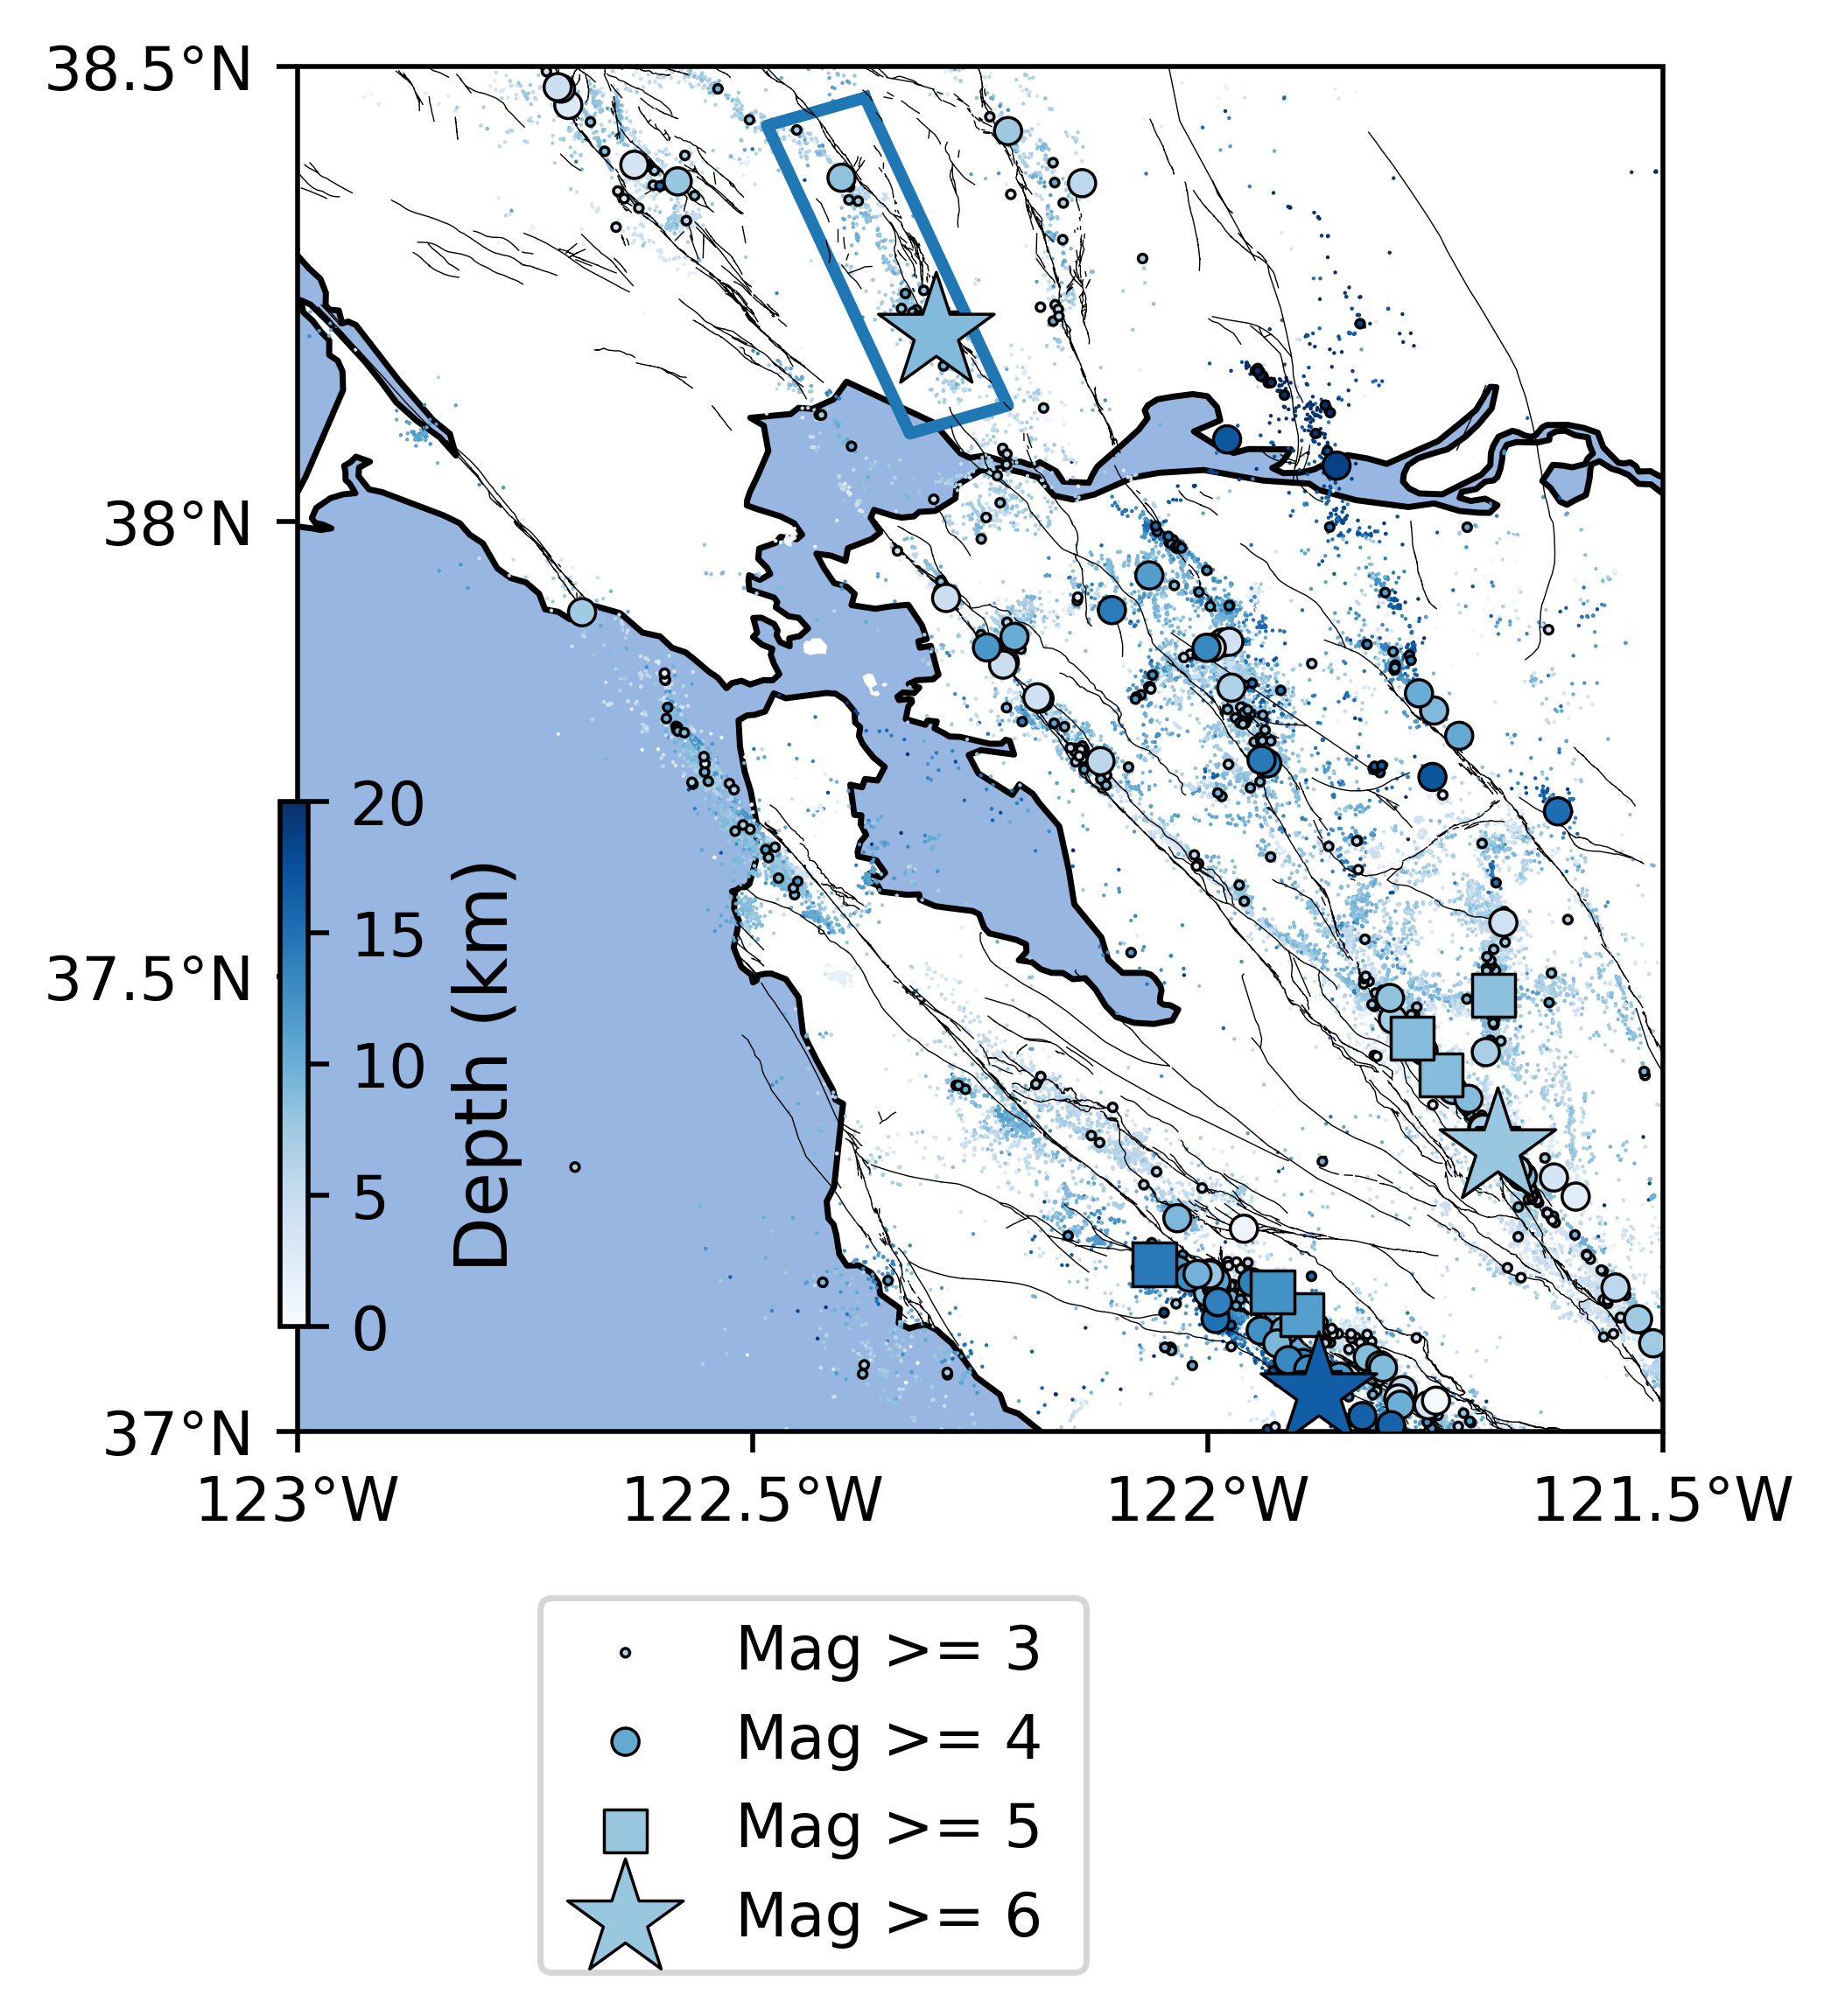

In [69]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

lake_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='k',
                                         linewidth=0.5,
                                        facecolor=cfeature.COLORS['water'])

provinces_10m = cfeature.NaturalEarthFeature('cultural',
                                             'admin_1_states_provinces_lines',
                                             '10m',
                                             facecolor='none')
oceans_10m = cfeature.NaturalEarthFeature('physical',
                                             'ocean',
                                             '10m',
                                             facecolor=cfeature.COLORS['water'])

fig=plt.figure()
ax = fig.add_axes([0, 0, 1, 0.65], projection=ccrs.PlateCarree())

ax.add_feature(lake_10m)
ax.add_feature(oceans_10m)
ax.add_feature(provinces_10m)
ax.add_feature(cfeature.BORDERS)
ax.coastlines('10m')

index = np.where(mag>=3)
ax.scatter(lon[index],lat[index],marker='o',s=2,lw=0.5,cmap='Blues',edgecolors='k',c=dep[index],zorder=5, \
              vmin=0,vmax=20,label='Mag >= 3')
index = np.where(mag>=4)
ax.scatter(lon[index],lat[index],marker='o',s=20,lw=0.5,cmap='Blues',edgecolors='k',c=dep[index],zorder=5, \
              vmin=0,vmax=20,label='Mag >= 4 ')
index = np.where(mag>=5)
ax.scatter(lon[index],lat[index],marker='s',s=50,lw=0.5,cmap='Blues',edgecolors='k',c=dep[index],zorder=5, \
              vmin=0,vmax=20,label='Mag >= 5 ')
index = np.where(mag>=6)
ax.scatter(lon[index],lat[index],marker='*',s=400,lw=0.5,cmap='Blues',edgecolors='k',c=dep[index],zorder=5, \
              vmin=0,vmax=20,label='Mag >= 6 ')
im = ax.scatter(lon,lat,c=dep,s=0.4,edgecolors='none',cmap='Blues', \
               vmin=0,vmax=20)
ax.legend(bbox_to_anchor=(0.6,-0.1))

ax.set_yticks(np.arange(36,39+0.1,0.5))
ax.set_xticks(np.arange(-123,-121+0.1,0.5))
ax.plot(qfault[:,1],qfault[:,0],lw=0.2,c='k',zorder=3)


ax.plot(box_coor_proj[:,1],box_coor_proj[:,0],lw=2)
lon_formatter = LongitudeFormatter(number_format='g',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='g')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_ylim(37,38.5)
ax.set_xlim(-123,-121.5)

cax1 = fig.add_axes([0.25, 0.05, 0.01, 0.25])
cbar=fig.colorbar(im,cax=cax1,fraction=0.04, pad=0.03,
                  label='Depth (km)',ticks=[0,5,10,15,20])
cbar.set_label(label='Depth (km)',fontsize=12)

In [28]:
def calc_Mc_b(mag,plot=0):
    nNumberMagnitude=np.floor(mag.max()*10)+1
    xx=np.linspace(np.floor(mag.min()*10)/10,mag.max(),int((np.floor(mag.max()*10)/10-
                                                            np.floor(mag.min()*10)/10)*10)+1)
    vhist,vMagBins=np.histogram(mag,bins=xx)
    iMc = np.where(vhist==vhist.max())[0][-1]
    fMc=vMagBins[iMc]
    hist = vhist[iMc:][::-1]
    bins = vMagBins[iMc:][::-1]
    cum_hist = hist.cumsum()
    log_cum_sum = np.log10(cum_hist)
    bins = bins[1:]
    b,a = np.polyfit(bins, log_cum_sum, 1)
    if plot==1:
        plt.figure()
        plt.subplot(211)
        plt.bar(vMagBins[:-1]+0.05,vhist,0.1)
        plt.axvline(x=fMc,c='r',lw=2)
        plt.title('Mc:'+ "{:.2f}".format(fMc)+'  '+'b value:'+  "{:.2f}".format(-b))
        plt.xlim(-1,8)
        plt.ylabel('Event number')
        plt.subplot(212)
        plt.plot(bins,np.log10(cum_hist))
        plt.plot(bins,a + b*bins)
        plt.xlim(-1,8)
        plt.xlabel('Magnitude')
        plt.ylabel('log10(CDF)')
        plt.show()
        
    return fMc, a, -b

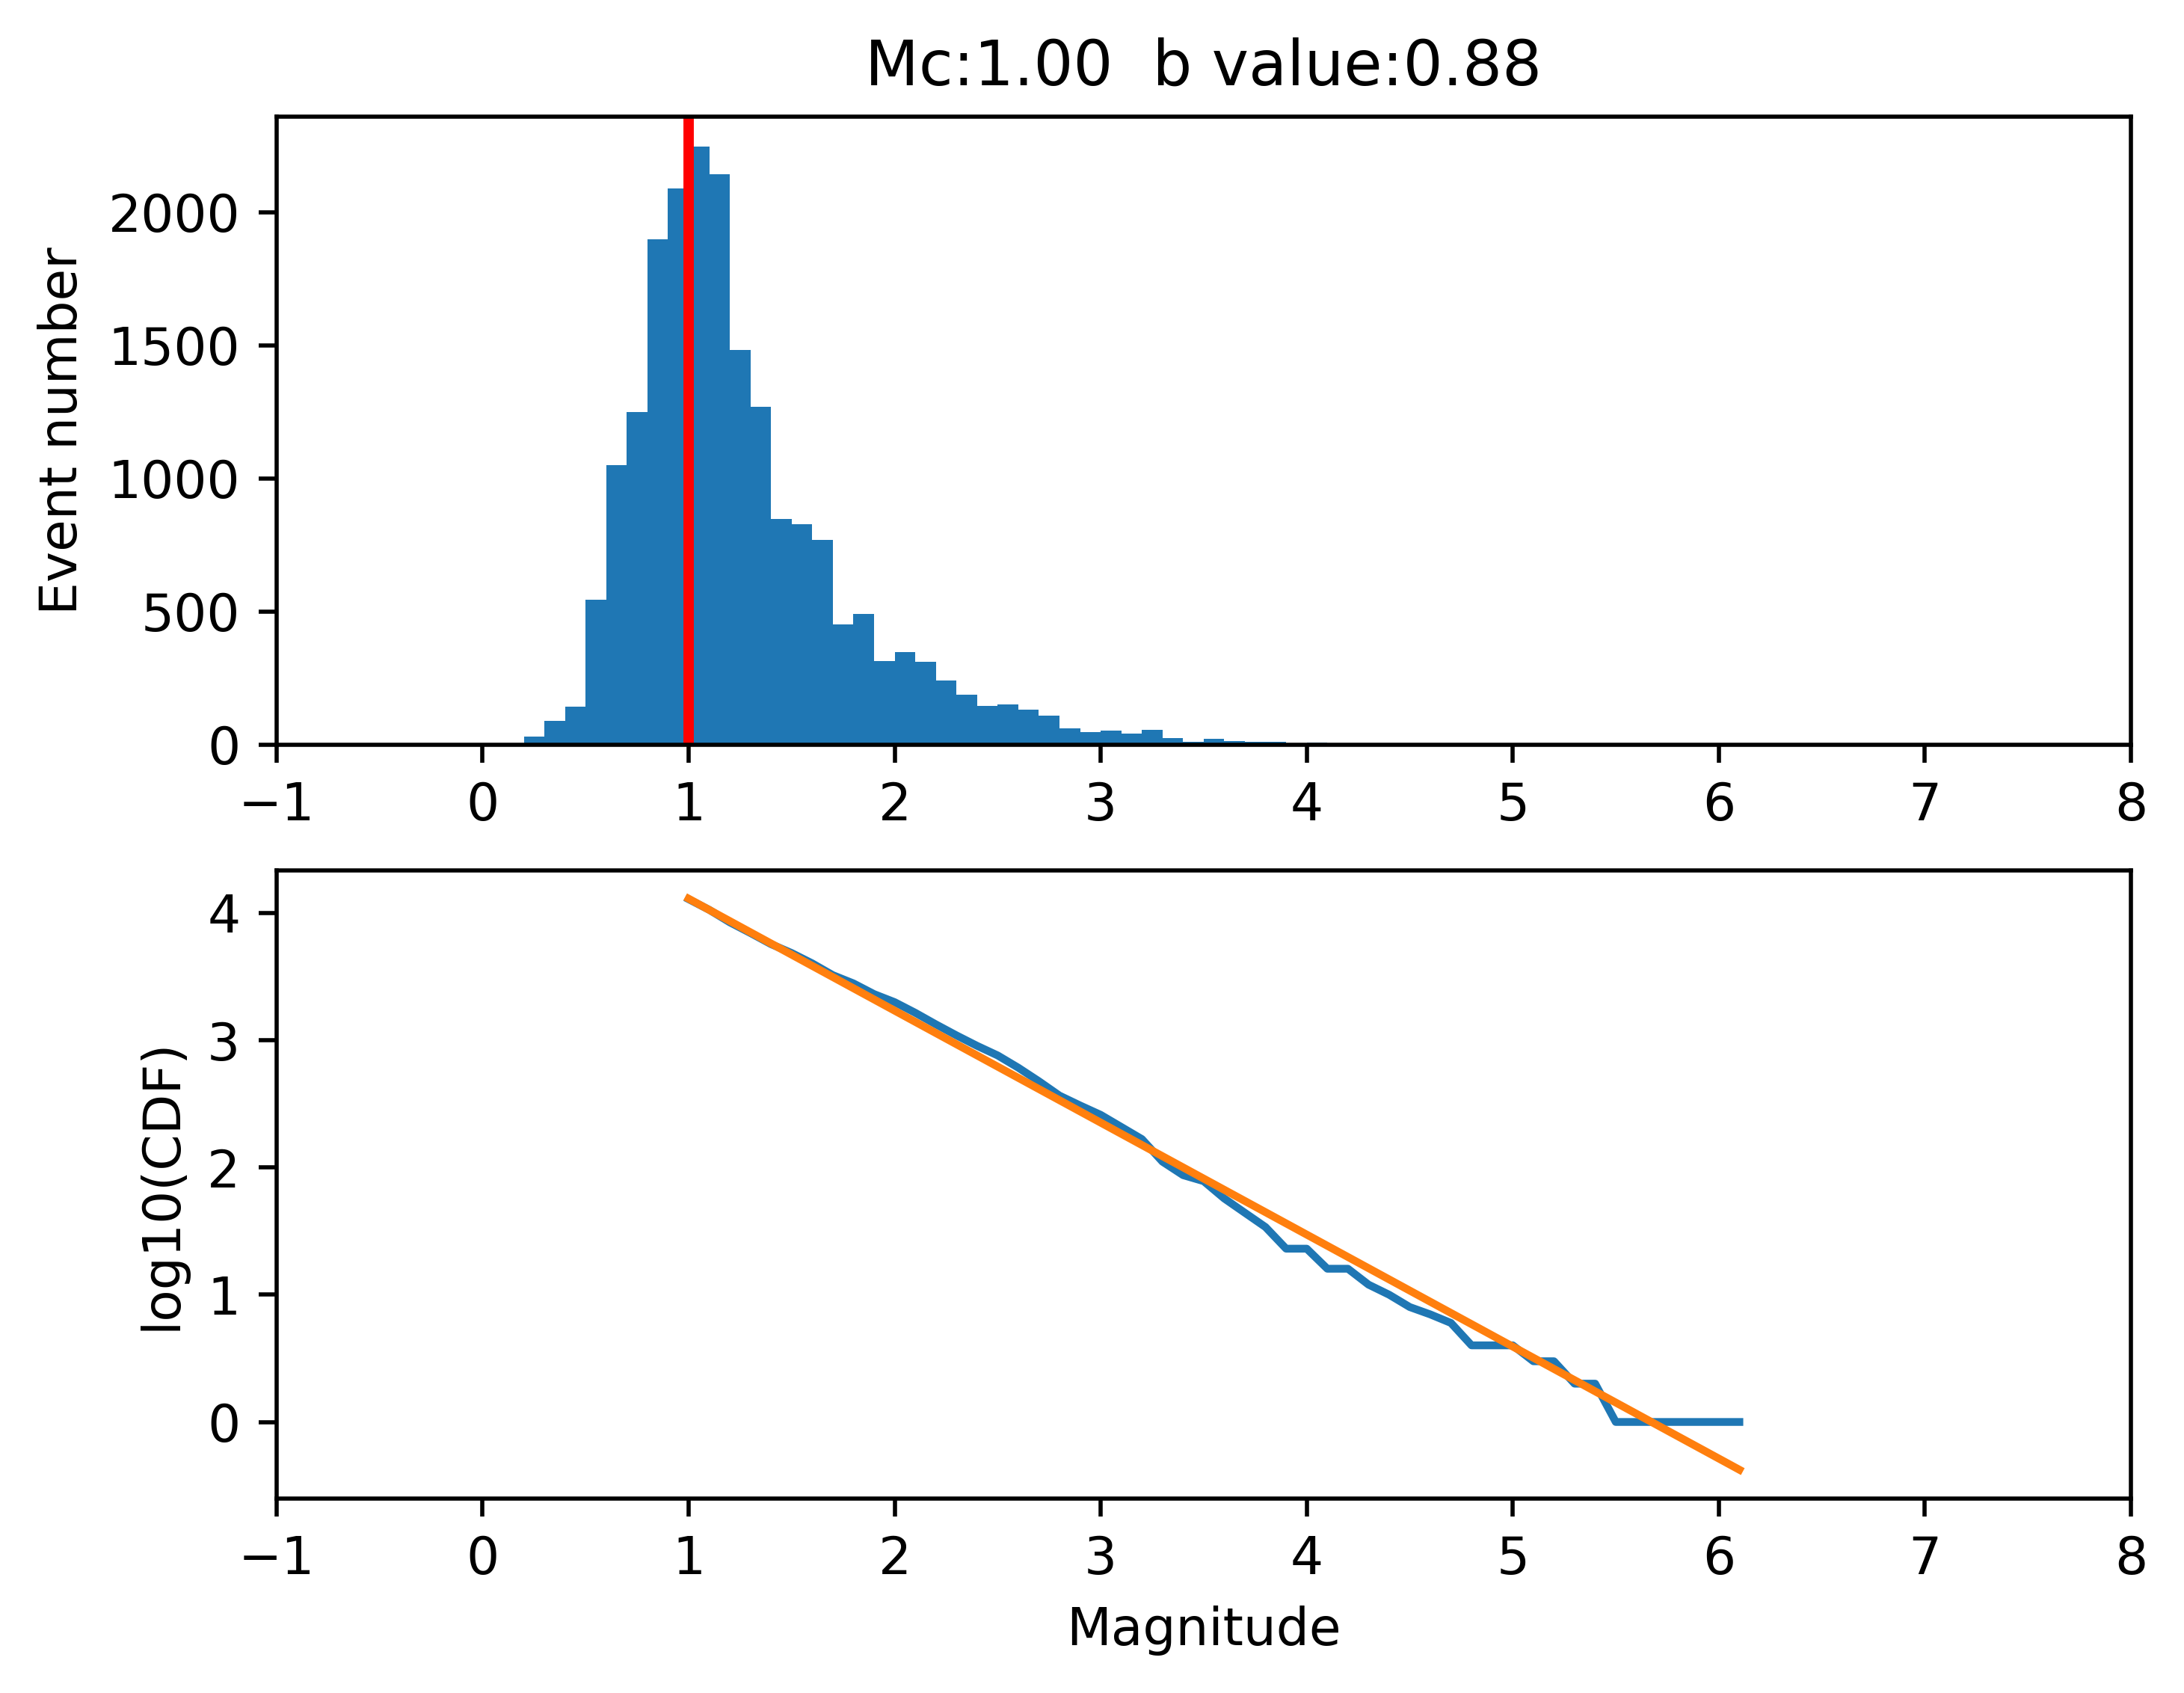

(1.0, 4.9917216783588954, 0.87983929924210735)

In [29]:
index = np.where((dist_along_proj<mdist_proj)&(dist_along_proj>0)&(dist_norm_proj<5)&(dist_norm_proj>-5))[0]

calc_Mc_b(mag[index],plot=1)

In [56]:
def addbVal_slide(arrayName,bval,dates,firstEQ=0,lastEQ=1,plot=0): #adds b values to given array and can also plot
    if plot==0:
        arrayName.append(bval)
    
    elif plot==1:
        xrange = len(arrayName)
        x = dates
        
        print(len(x),len(arrayName))
        
        #a,b = np.polyfit(x,arrayName,1)
        
        bMed = np.median(arrayName)
        YLBuffer = 0.1 * bMed
            
        plt.axhspan(0,bMed-YLBuffer,0,xrange,color="red",alpha=0.5)
        plt.axhspan(bMed-YLBuffer,bMed+YLBuffer,0,xrange,color="yellow",alpha=0.5)
        plt.axhspan(bMed+YLBuffer,np.max(arrayName)+0.5,0,xrange,color="green",alpha=0.5)
        #arbitrary range for colors for now, need to read up more on how to choose these.
        
        plt.axhline(y = bMed, color = 'black', linestyle = '--',label=f"Median ({np.around(bMed,3)})")
        #plt.plot(x,arrayName,'b-',label="b-value")
        plt.plot(x,arrayName,'b-',label="b-value",markersize=3,linewidth=1)

        #plt.plot(x,a*x+b,'r',label=f"Best fit line")
        
        plt.xlabel(f"Year")
        plt.ylabel('')
        plt.legend()
        plt.ylim(0,np.max(arrayName)+0.5)
        plt.xticks(np.arange(np.around(firstEQ), np.around(lastEQ), step=3))  # Set label locations.
        #plt.xticks([0,1,2],[firstEQ,"middle",lastEQ])
        #plt.rc('xtick', labelsize=3)

1852 [   13    50   176 ..., 57834 57871 57901]
end of loop, steps: 1652; date of last eq: 57901; last b: 0.8854705432918488
x range: 2000.673111156016 to 2022.9496266685692; array lengths: (1653, 1653)
1653 1653


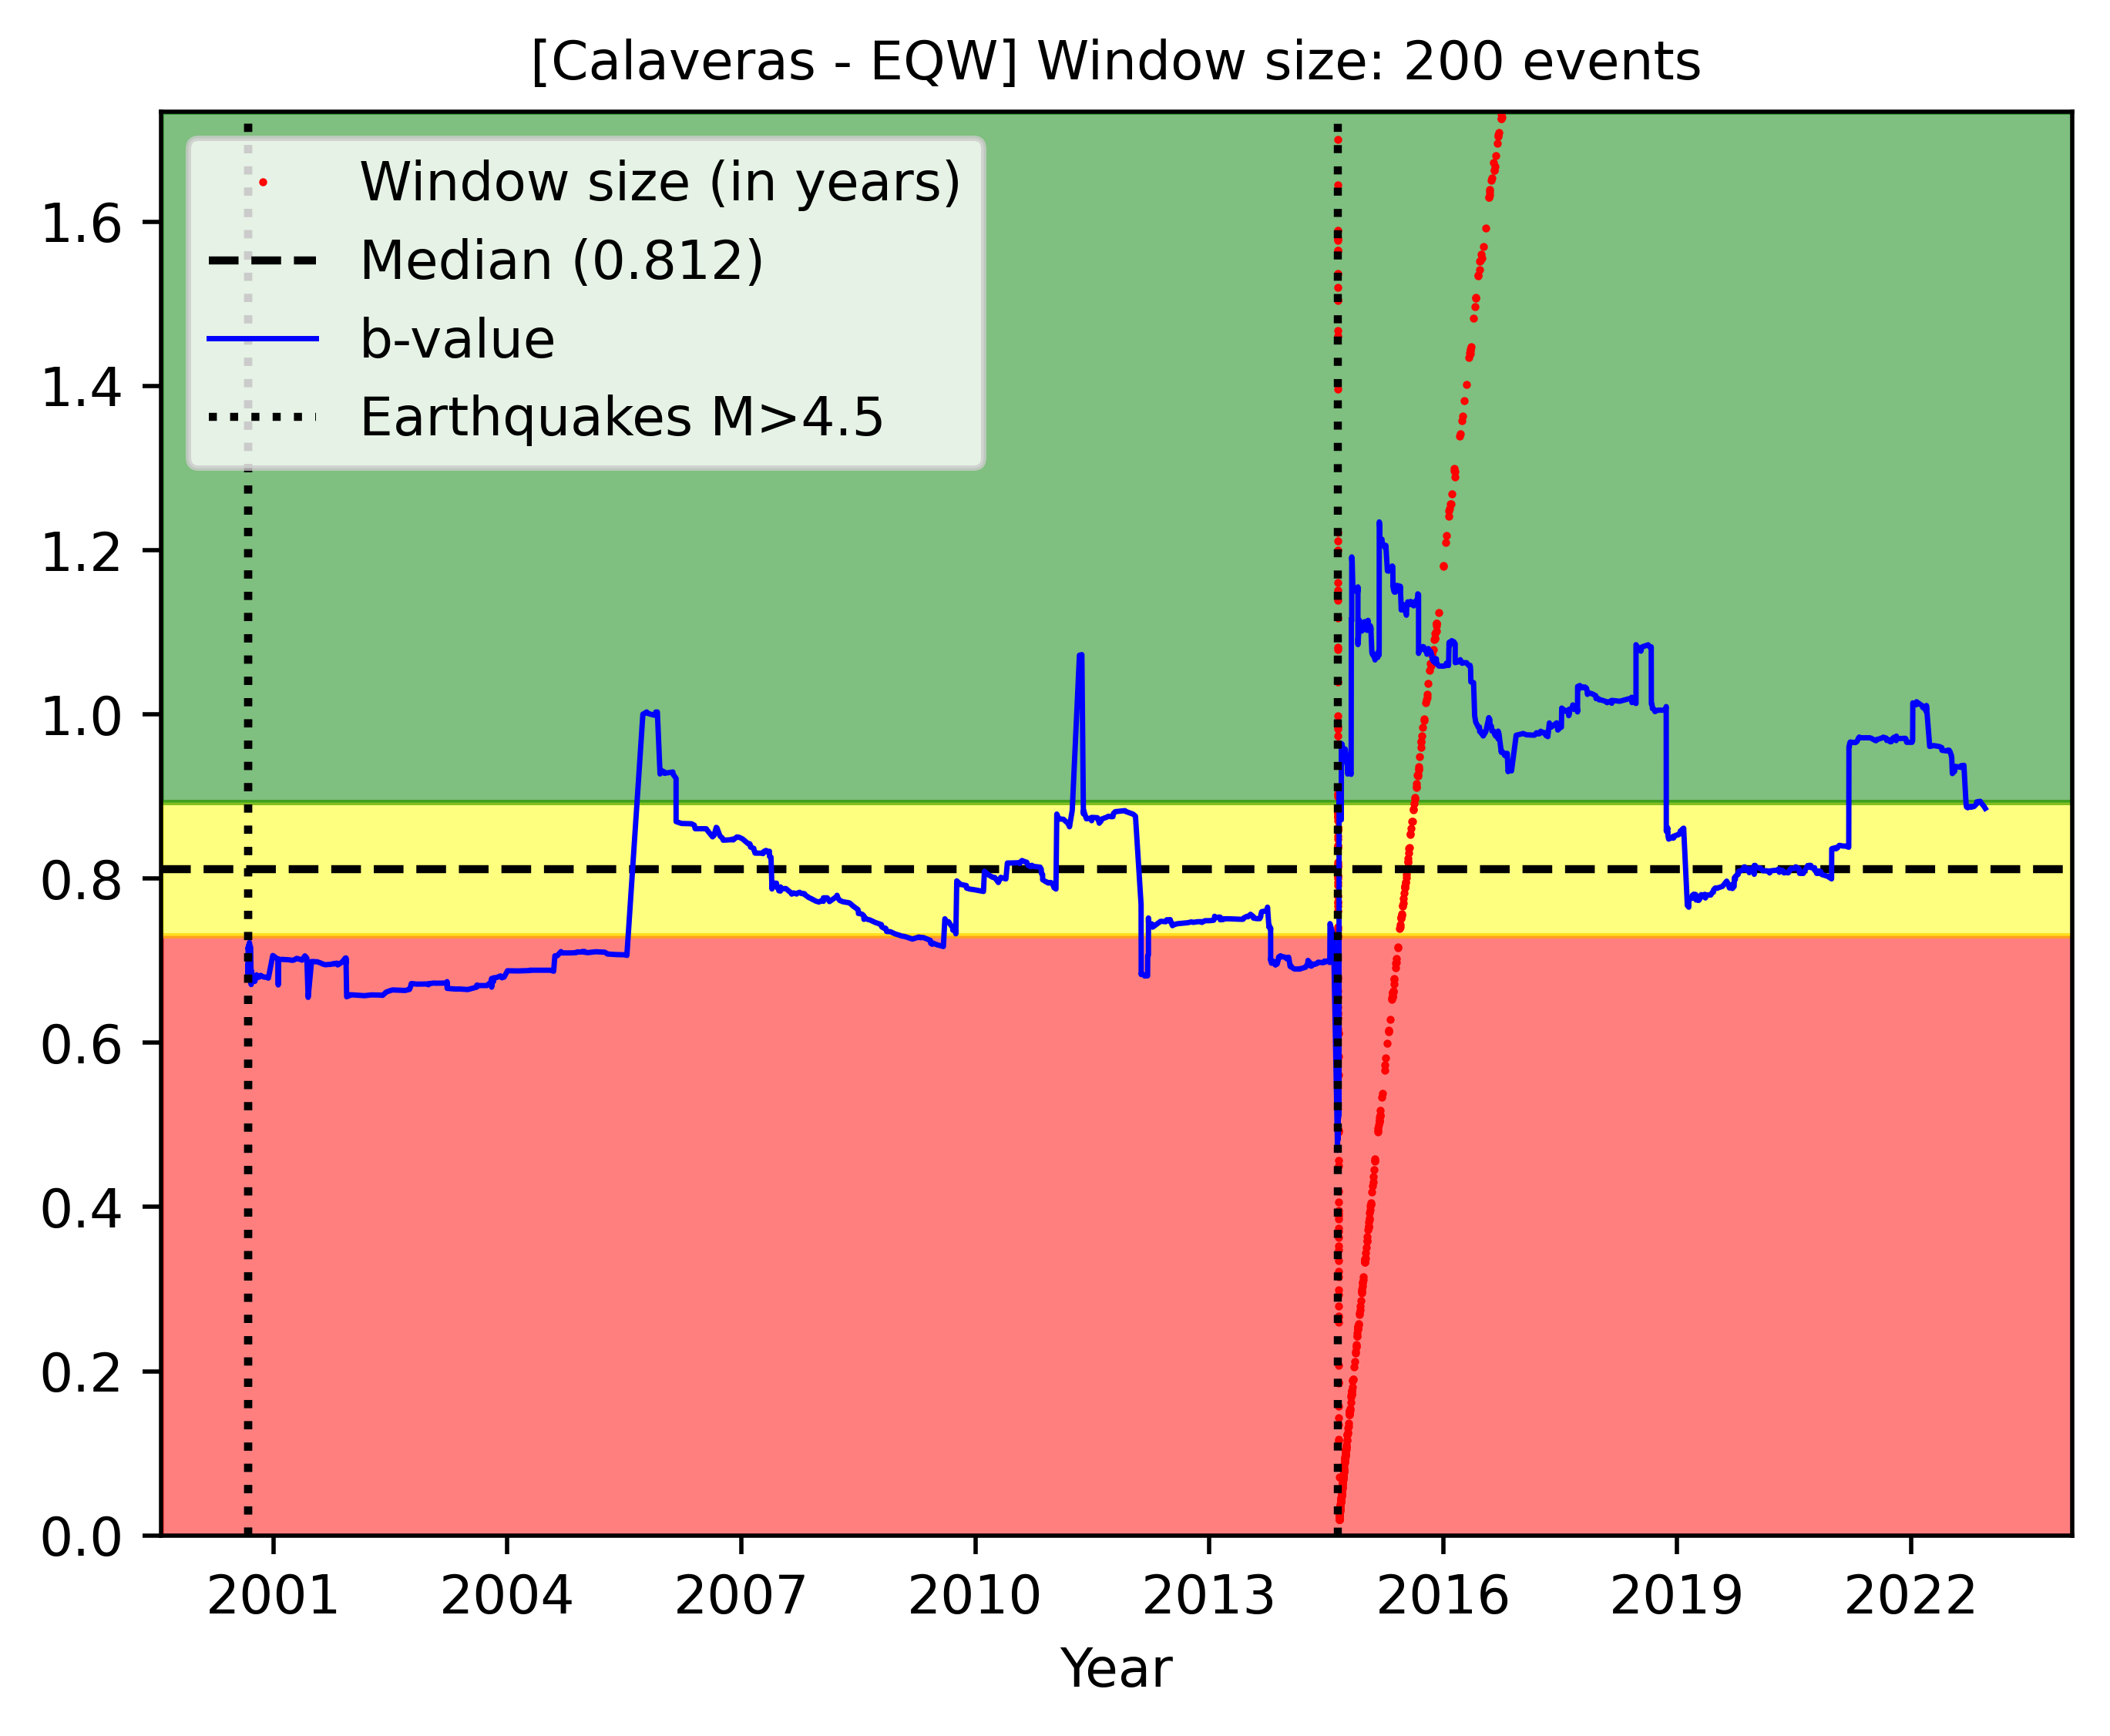

In [70]:
slide = []
bDates = []
ewLens = []

timeStart = np.min(time_year)
timeEnd = np.max(time_year) #or custom decimal year dates
timeTotal = timeEnd - timeStart

areaParams = (dist_along_proj<70)&(dist_along_proj>0)&(dist_norm_proj<5)&(dist_norm_proj>-5)
timeParams = (time_year>timeStart)&(time_year<timeEnd)

bigMag = 4.5

data = np.where(areaParams&timeParams)
#data = np.where(timeParams&areaParams&(mag<=bigMag))
index = data[0]
print(len(index),index)

ewSize = 200 #number of eqs per window

for i in range(len(index)):

    ew = index[i:i+ewSize] # filter 'ew' by 'wParams'
    ewEnd = time_year[ew][-1]
    bDates.append(time_year[ew[-1]]) # append last event date in 'ew'. Provided by ChatGPT

    bEW = calc_Mc_b(mag[ew])[2]
    addbVal_slide(slide,bEW,bDates)

    ewLens.append((np.max(time_year[ew])-np.min(time_year[ew])))

    if ew[-1] >= max(index):
        print(f"end of loop, steps: {i}; date of last eq: {ew[-1]}; last b: {bEW}")
        xMin = np.min(bDates)
        xMax = np.max(bDates)
        print(f"x range: {xMin} to {xMax}; array lengths: {len(slide),len(bDates)}")
        plt.plot(bDates,ewLens,"ro",markersize=0.5,label="Window size (in years)")
        addbVal_slide(slide,bEW,bDates,xMin,xMax,1)
        break

bigEqs = np.where(areaParams&timeParams&(mag>bigMag))
bigDates = time_year[bigEqs]

for x in bigDates:
    if x == min(bigDates):
        plt.axvline(x, color='black', linestyle=':',label=f'Earthquakes M>{bigMag}')
    plt.axvline(x, color='black', linestyle=':')

# plt.plot(bDates,ewLens,"ro",markersize=0.5,label="Window size (in years)")
plt.title(f"[Calaveras - EQW] Window size: {ewSize} events",fontsize=10)
#plt.xlim(1983,1987)
plt.legend()

### Use this cell to plot the data again without having to run all the b-value calculations again :)

1653 1653


Text(0.5, 1.0, '[Napa - EQW] Window size: 200 events')

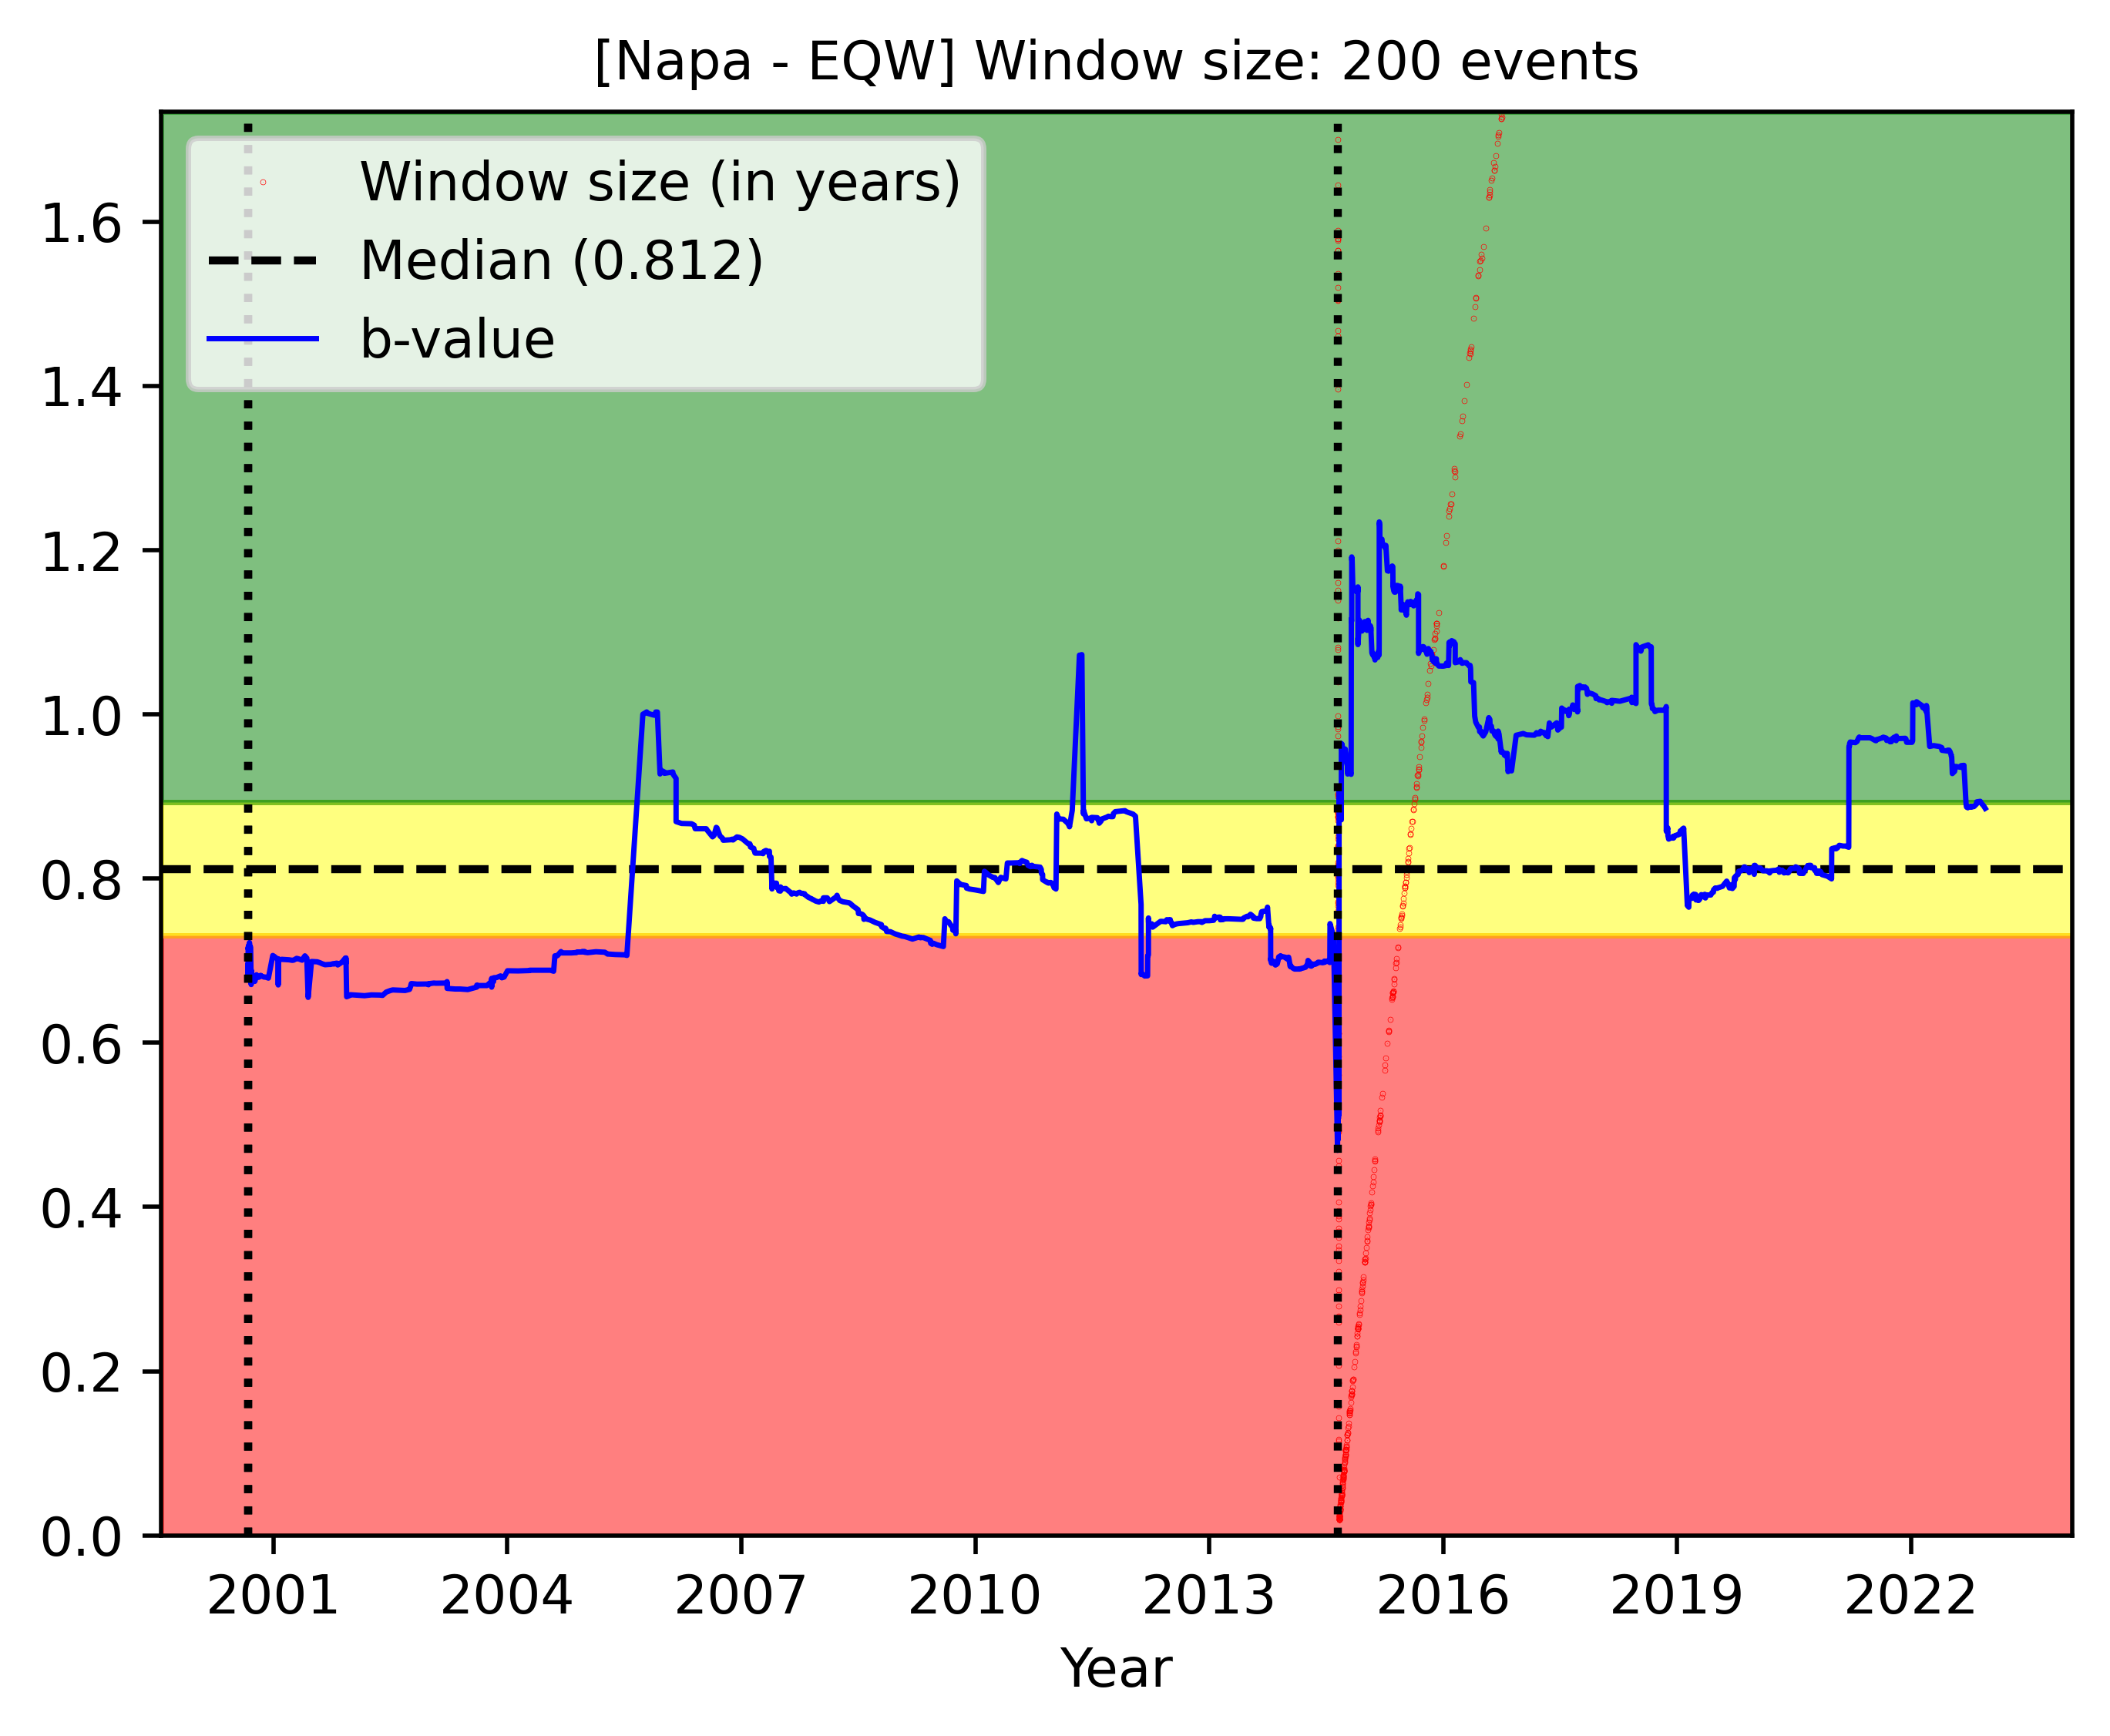

In [76]:
plt.plot(bDates,ewLens,"r.",markersize=0.2,label="Window size (in years)")
addbVal_slide(slide,bEW,bDates,xMin,xMax,1)
for x in bigDates:
    if x == min(bigDates):
        plt.axvline(x, color='black', linestyle=':',label=f'Earthquakes M>{bigMag}')
    plt.axvline(x, color='black', linestyle=':')

# plt.plot(bDates,ewLens,"ro",markersize=0.5,label="Window size (in years)")
plt.title(f"[Napa - EQW] Window size: {ewSize} events",fontsize=10)
#plt.yticks(np.arange(0, 2, step=0.15))
#plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
#plt.xlim(2006,2009)

### This cell calculates Δb. This apprach does not discriminate earthquakes that are soon followed by a large one, but all magnitudes and dates are printed so it's easier to tell which would be removed. 

In [72]:
print(f"Dates when earthquakes of magnitude {bigMag} or more occured: {bigDates}")
bigIndices = []

for x in bigDates: #grabs indices of when the big earthquakes happened. These can be used to find the b-value right at that earthquake (and before, and after)
    for i, ty in enumerate(time_year[index]): #i: indices; ty: dates (I've finally learnt what enumerate does haha)
        if x == ty: #finds where the dates match
             bigIndices.append(i)

print(f"Indices of these earthquakes in the b-value dataset: {bigIndices}. Magnitudes: {mag[index][bigIndices]}")

mws = 500 #mws: median window size (determines how many b-values before the value in question will be used to calculate the median)
diffs = []

for i in range(len(bigIndices)):
    ind = bigIndices[i] #large earthquake index
    if ind < mws:
        print(f"Earthquake {i+1} out of {len(bigIndices)} not included (not enough values for median). Magnitude tossed: {mag[index][ind]}. Date: {time_year[index][ind]}")
        continue
    if ind > len(slide):
        print(f"Earthquake {i+1} out of {len(bigIndices)} and beyond not included (too close to end of dataset). First magnitude tossed: {mag[index][ind]}. Date: {time_year[index][ind]}")
        break
    bEvent = slide[ind] #b-value at large earthquake
    medw = slide[ind-mws:ind] #median window
    #print(bEvent,len(medw),medw)
    mbEvent = np.median(medw) #median before event
    bDiff = -(mbEvent - bEvent) #bDiff is Δb
    diffs.append(bDiff)
    print(f"Earthquake {i+1} out of {len(bigIndices)} added. Magnitude: {mag[index][ind]}. Date: {time_year[index][ind]}. Median deviation: {bDiff}")

print(f"Absolute deviation from the median of {mws} b-values before each big event: {diffs}")
#print(f"Magnitudes of each earthquake: {mag[bigIndices]}")

Dates when earthquakes of magnitude 4.5 or more occured: [ 2000.67311116  2014.64501662]
Indices of these earthquakes in the b-value dataset: [199, 822]. Magnitudes: [ 4.9   6.02]
Earthquake 1 out of 2 not included (not enough values for median). Magnitude tossed: 4.9. Date: 2000.673111156016
Earthquake 2 out of 2 added. Magnitude: 6.02. Date: 2014.6450166206876. Median deviation: -0.18421701157972925
Absolute deviation from the median of 500 b-values before each big event: [-0.18421701157972925]


In [73]:
print(f"Dates when earthquakes of magnitude {bigMag} or more occured: {bigDates}")
#print(len(mag[index]))
bigIndices = []

for x in bigDates: #grabs indices of when the big earthquakes happened. These can be used to find the b-value right at that earthquake (and before, and after)
    for i, ty in enumerate(time_year[index]):
        if x == ty:
             #print(ty,"eq",[i])
             bigIndices.append(i)
             #print(bInd)

print(f"Indices of these earthquakes in the b-value dataset: {bigIndices}. Magnitudes: {mag[index][bigIndices]}")

mwm = 200 #mwm: median window minimum (to prevent errors)
bbs = []
prominence = []
diffs = []
eType = [] #todo: apply constraints to find event types (look at earthquakes before and after; do they follow a big one, are they followed by one, etc.)

for j in range(len(bigIndices)):
    print(j)
    tossed = False
    ind = bigIndices[j] #large earthquake index
    cMag = mag[index][ind] #current magnitude
    cDate = time_year[index][ind]

    if ind < mwm:
        print(f"Earthquake {j+1} out of {len(bigIndices)} not included. Magnitude tossed: {cMag}. Date: {cDate}")
        bbs.append(float('nan'))
        diffs.append(float('nan'))
        for k, m in enumerate(mag[index][ind+1:]):
            if ind+k == len(index)-2: #breaks if end of catalog is reached
                print(f"end of catalog; prominence: {k}")
                prominence.append(k)
                break
                if m > bigMag or m > cMag: #mainshock detector
                    print(f"mainshock found; prominence: {k} after current, magnitude: {m}. Current: {ind}, {mag}")
                    prominence.append(k)
                    break
        continue
    # if ind > len(slide):
    #     print(f"Earthquake {j+1} out of {len(bigIndices)} and beyond not included. First magnitude tossed: {cMag}. Date: {cDate}")
    #     break
    #print('test test',len(mag[index]),ind,ind-mwm,ind+mwm,mag[index][ind-1],mag[index][ind])

    bbEvent = calc_Mc_b(mag[index][ind-mwm:ind-1])[2] #b-value before large earthquake
    bbs.append(bbEvent)
    baEvent = calc_Mc_b(mag[index][ind:ind+mwm])[2]

    print(f"current b-values: before {bbEvent}, after {baEvent}")

    for k, m in enumerate(mag[index][ind+1:]):
        print(f"overall: {ind+k}/{len(index)-2}")
        if ind+k == len(index)-2: #breaks if end of catalog is reached
            print(f"end of catalog; prominence: {k}")
            prominence.append(k)
            break
        if k <= mwm:
            print(f"checking for mainshock events: # {k}/{mwm}. mag: {m} vs cmag {cMag}. overall: {ind+k}/{len(index)-2}")
            if m > cMag: #mainshock detector
                print(f"mainshock found; prominence: {k} after current, magnitude: {m}. Current: {ind}, {mag}")
                prominence.append(k)
                if k < mwm: #will not calculate a b-value with less than mwm (200) per window
                    print(f"Earthquake {j+1} out of {len(bigIndices)} not included (mainshock follows too closely). Magnitude tossed: {cMag}. Date: {cDate}")
                    tossed = True
                    break
                elif k >= mwm: #meets window minimum, but only takes same window size for consistency
                    print(f"find da mainshock lol ;;;; {mag[index][ind+k-1]},{mag[index][ind+k]}")
                    print(len(mag[index][ind:ind+mwm-1]))
                    baEvent = calc_Mc_b(mag[index][ind:ind+mwm-1])[2]
                    break
        elif m > bigMag: #counts earthquake prominence if there is no mainshock
            print(f"no mainshock; prominence: {k}")
            prominence.append(k)
            break
        continue

    if tossed == True:
        diffs.append(float('nan'))
        continue

    deltab = baEvent - bbEvent
    diffs.append(deltab)
    print(f"Earthquake {j+1} out of {len(bigIndices)} added. Magnitude: {cMag}. Date: {cDate}. Median deviation: {bDiff}")

print(f"delta-b of large earthquakes; b-values taken {mws} earthquakes before each big event: {diffs}")
print(f"prominences: {prominence}")
#print(f"Magnitudes of each earthquake: {mag[bigIndices]}")

Dates when earthquakes of magnitude 4.5 or more occured: [ 2000.67311116  2014.64501662]
Indices of these earthquakes in the b-value dataset: [199, 822]. Magnitudes: [ 4.9   6.02]
0
Earthquake 1 out of 2 not included. Magnitude tossed: 4.9. Date: 2000.673111156016
end of catalog; prominence: 1651
1
current b-values: before 0.7423144929242458, after 0.5140800490360637
overall: 822/1850
checking for mainshock events: # 0/200. mag: 3.81 vs cmag 6.02. overall: 822/1850
overall: 823/1850
checking for mainshock events: # 1/200. mag: 3.51 vs cmag 6.02. overall: 823/1850
overall: 824/1850
checking for mainshock events: # 2/200. mag: 2.47 vs cmag 6.02. overall: 824/1850
overall: 825/1850
checking for mainshock events: # 3/200. mag: 2.2 vs cmag 6.02. overall: 825/1850
overall: 826/1850
checking for mainshock events: # 4/200. mag: 2.03 vs cmag 6.02. overall: 826/1850
overall: 827/1850
checking for mainshock events: # 5/200. mag: 1.75 vs cmag 6.02. overall: 827/1850
overall: 828/1850
checking for 

In [74]:
import pandas as pd

print(len(time_year[index][bigIndices]),len(mag[index][bigIndices]),len(bbs),len(diffs),len(prominence))

data = {f"Date": time_year[index][bigIndices],
        f"Magnitude": mag[index][bigIndices], 
        f"background b-value (n = {mwm})": bbs, 
        f"Δb (n = {mwm})": diffs,
        f"Prominence": prominence
        }

df = pd.DataFrame(data)

df

2 2 2 2 2


,Date,Magnitude,background b-value (n = 200),Δb (n = 200),Prominence
0,2000.673111,4.90,NaN,NaN,1651
1,2014.645017,6.02,0.742314,-0.228234,1028
